In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset_project/credit_customers.csv')

In [6]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [8]:
df[['sex', 'marriage']] = df.personal_status.str.split(" ", expand = True)
df.drop(['personal_status'], axis=1, inplace = True)

In [9]:
categorical = list()
numerical   = list()

for name in df.columns:
    if df[name].dtype == 'object':
        categorical.append(name)
    else:
        numerical.append(name)

print(f'Categorical features: {categorical}')
print(f'Numerical features: {numerical}')

Categorical features: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class', 'sex', 'marriage']
Numerical features: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


In [10]:
for name in categorical:
    print(f'{name}: {list(df[name].unique())}')

checking_status: ['<0', '0<=X<200', 'no checking', '>=200']
credit_history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
savings_status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
employment: ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
other_parties: ['none', 'guarantor', 'co applicant']
property_magnitude: ['real estate', 'life insurance', 'no known property', 'car']
other_payment_plans: ['none', 'bank', 'stores']
housing: ['own', 'for free', 'rent']
job: ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res']
own_telephone: ['yes', 'none']
foreign_worker: ['yes', 'no']
class: ['good', 'bad']
sex: ['male', 'female']
marriage: ['single', 'div/dep/mar', 'div/sep', 'mar/wid']


In [12]:
for name in numerical:
    print(f'{name}: {list(df[name].unique())}')

duration: [6.0, 48.0, 12.0, 42.0, 24.0, 36.0, 30.0, 15.0, 9.0, 10.0, 7.0, 60.0, 18.0, 45.0, 11.0, 27.0, 8.0, 54.0, 20.0, 14.0, 33.0, 21.0, 16.0, 4.0, 47.0, 13.0, 22.0, 39.0, 28.0, 5.0, 26.0, 72.0, 40.0]
credit_amount: [1169.0, 5951.0, 2096.0, 7882.0, 4870.0, 9055.0, 2835.0, 6948.0, 3059.0, 5234.0, 1295.0, 4308.0, 1567.0, 1199.0, 1403.0, 1282.0, 2424.0, 8072.0, 12579.0, 3430.0, 2134.0, 2647.0, 2241.0, 1804.0, 2069.0, 1374.0, 426.0, 409.0, 2415.0, 6836.0, 1913.0, 4020.0, 5866.0, 1264.0, 1474.0, 4746.0, 6110.0, 2100.0, 1225.0, 458.0, 2333.0, 1158.0, 6204.0, 6187.0, 6143.0, 1393.0, 2299.0, 1352.0, 7228.0, 2073.0, 5965.0, 1262.0, 3378.0, 2225.0, 783.0, 6468.0, 9566.0, 1961.0, 6229.0, 1391.0, 1537.0, 1953.0, 14421.0, 3181.0, 5190.0, 2171.0, 1007.0, 1819.0, 2394.0, 8133.0, 730.0, 1164.0, 5954.0, 1977.0, 1526.0, 3965.0, 4771.0, 9436.0, 3832.0, 5943.0, 1213.0, 1568.0, 1755.0, 2315.0, 1412.0, 12612.0, 2249.0, 1108.0, 618.0, 1409.0, 797.0, 3617.0, 1318.0, 15945.0, 2012.0, 2622.0, 2337.0, 7057.0, 

In [11]:
df[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
print(f'NaN values: {df.isna().sum().sum()}')

NaN values: 0


# Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = sns.color_palette()

See the class distribution of the label

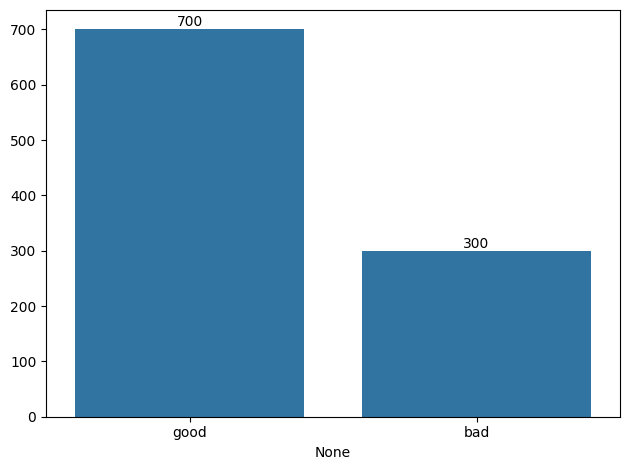

In [ ]:
label = df['class'].value_counts()
x = sns.barplot(x=label.index, y=label.values)
x.bar_label(x.containers[0])
plt.tight_layout()
plt.show()

**Conclusion:** The plot shows a huge class imbalance. Taking the problem into account, I consider it a natural imbalance since there are many more people with financial stability and unlikely to default than the opposite.

## Categorical

We will visualize all the categorical attributes at once using the subplots() function. This will be done as follows. Each plot will only have two bars, one representing users considered good appliants (y='good') and the other representing bad appliants (y='bad'). Both bars will be made up of stacked sub-bars representing the classes of an attribute.

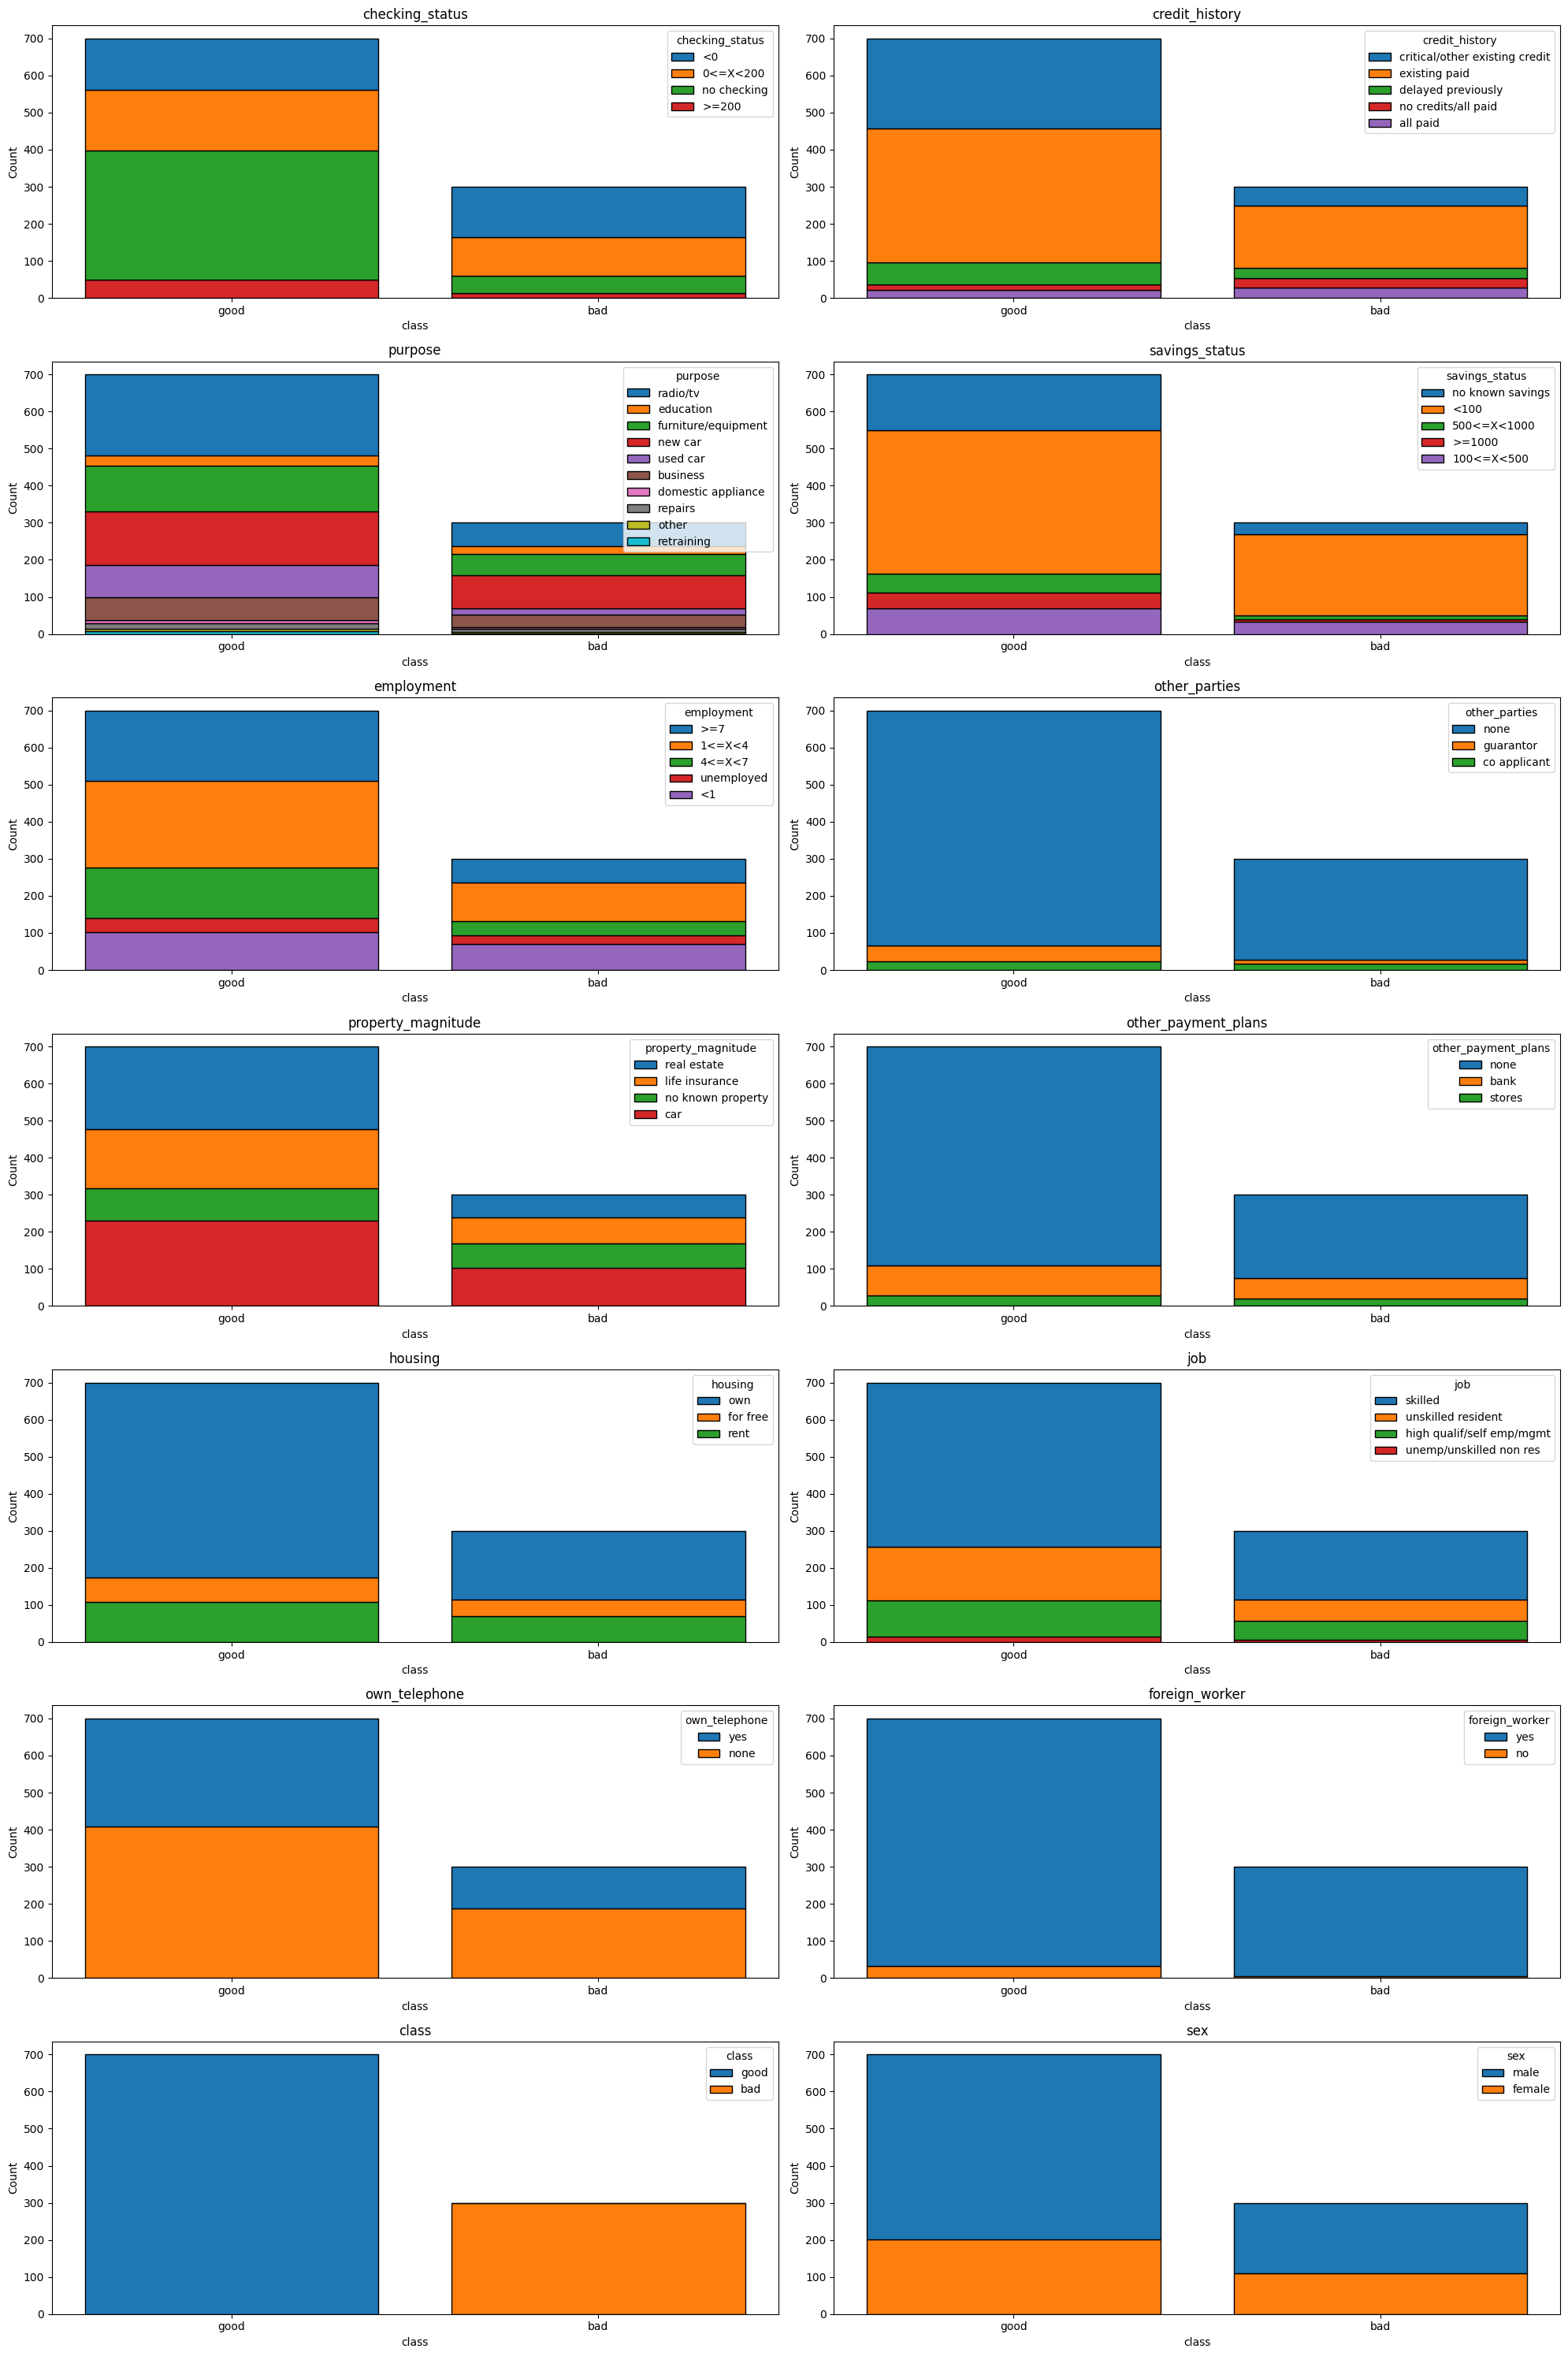

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
for name, axis in zip(df[categorical], ax.ravel()):
    sns.histplot(data=df, x='class', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
    axis.set_title(name)
plt.tight_layout()
plt.show()

**Conclusion:** Below, the patterns that stand out the most in the charts.

* class vs checking_status: The majority of good appliants have no checking while the majority of bad appliants fall into two groups:
 * people whose checking_status is negative
 * people who have up to 200 dollars

* class vs purpose: Most good appliants use the loan money to buy radio/TV. Bad appliants on the other hand use the money to buy cars.

The remaining plots show very similar class patterns between bad and good appliants.

## Numerical

We are going to do the same kind of visualization on some discrete features.

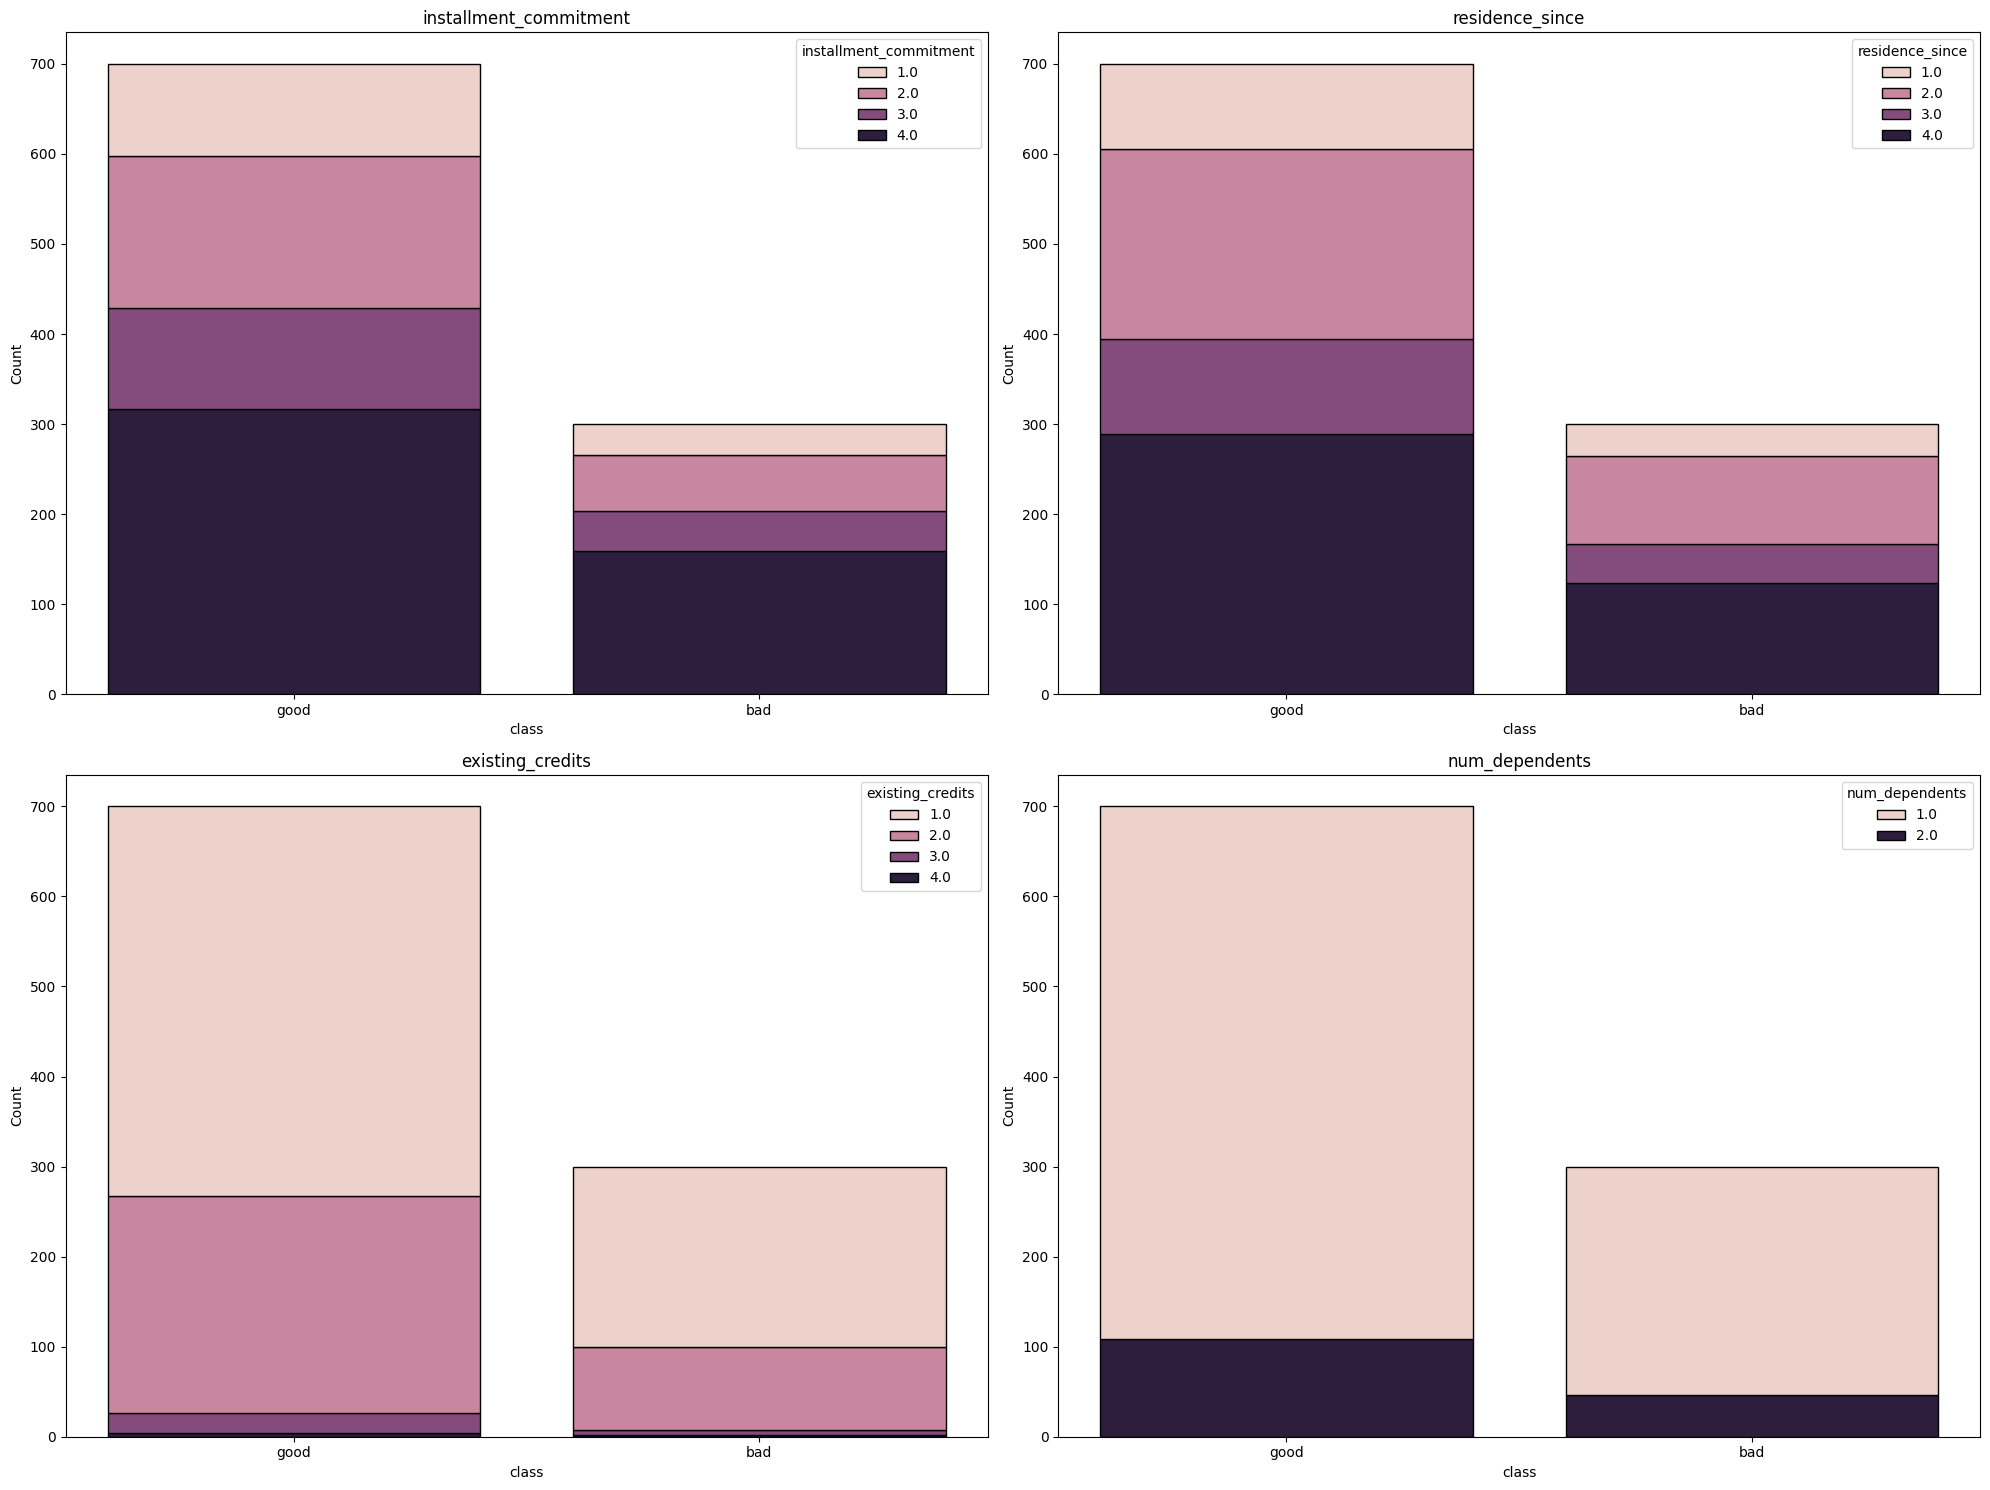

In [ ]:
discrete = ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(df[discrete], ax.ravel()):
    sns.histplot(data=df, x='class', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
    axis.set_title(name)
plt.tight_layout()
plt.show()

Conclusion: The patterns identified in 'good' are repeated in 'bad'. There's nothing visually significant here. Who knows, with a hypothesis test like Chi Square for example it may be possible to identify which attributes are most important in appliant labeling.

Regarding continuous features, I will plot them individually. First I will look at the distribution of values for each feature. Then I will use the Pandas scatter_matrix() function which will create a plot for each combination of attributes. As there are three, 3^2=9 plots will be created.

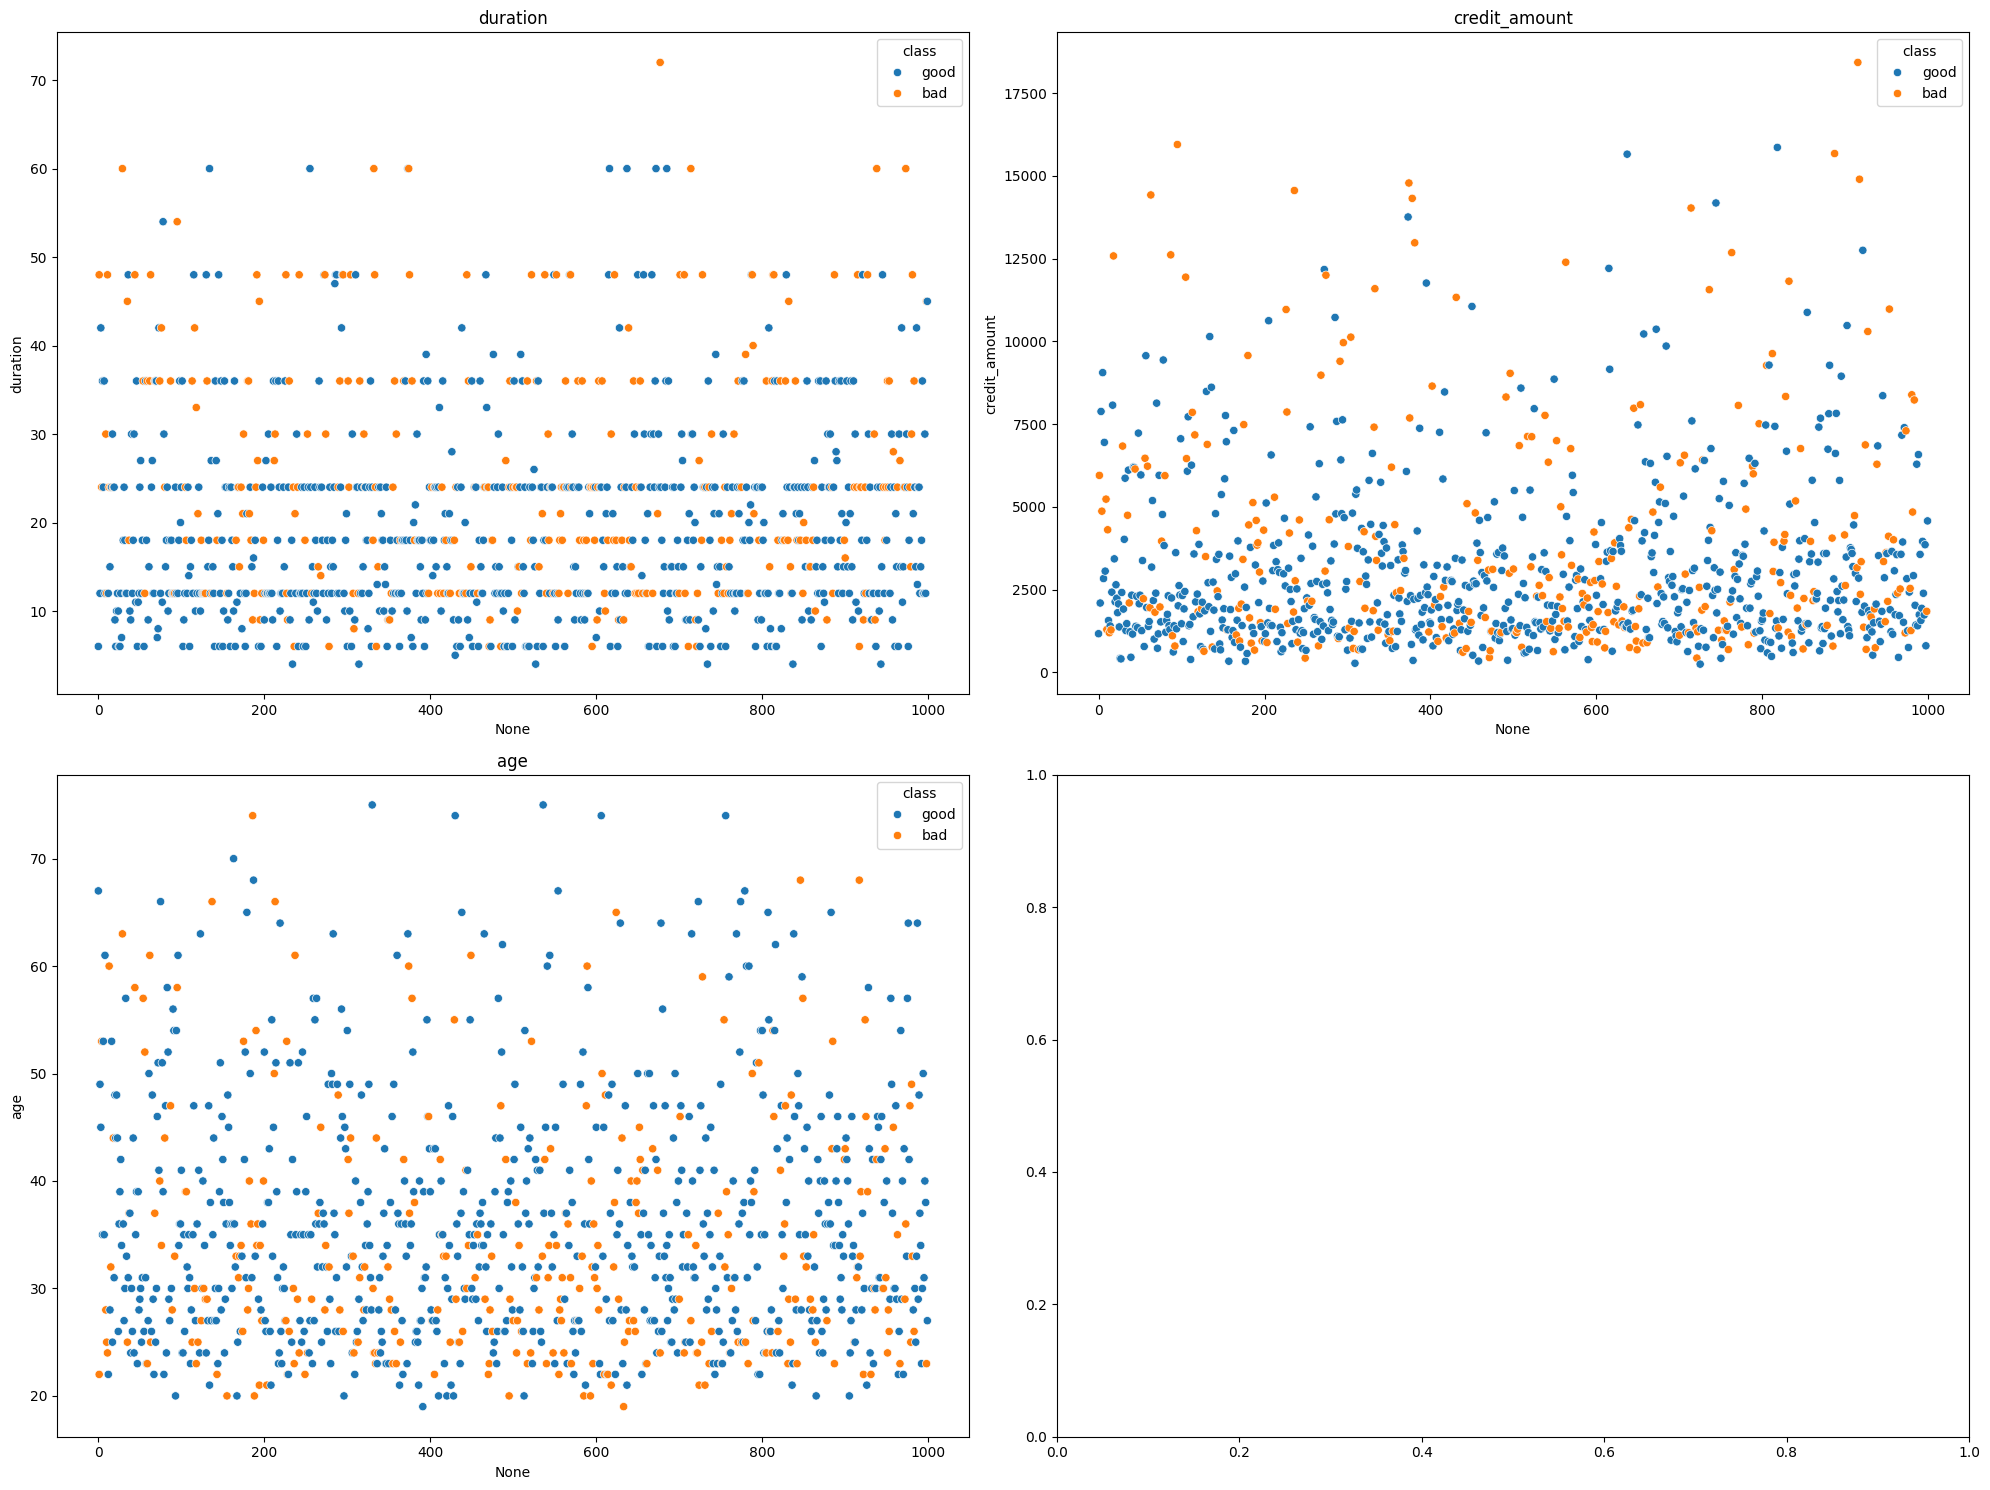

In [ ]:
continuous = ['duration', 'credit_amount', 'age']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(df[continuous], ax.ravel()):
    sns.scatterplot(data=df, x=df.index, y=name, hue='class', ax=axis)
    axis.set_title(name)
plt.tight_layout()
plt.show()

Conclusion: In the index vs duration plot there are patterns of points forming horizontal lines, this means that there are many records with these values enough for us to identify the lines. By calling value_counts() is possible to identify that the numbers forming this pattern are: 12, 18, 24 and 36. Is not a bad idead to remove these records to prevent models from learning to reproduce these data peculiarities and generalize better.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical:
  df[i] = le.fit_transform(df[i])

df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,1,6.0,1,6,1169.0,4,3,4.0,2,4.0,...,1,1,2.0,1,1.0,1,1,1,1,3
1,0,48.0,3,6,5951.0,2,0,2.0,2,2.0,...,1,1,1.0,1,1.0,0,1,0,0,0
2,3,12.0,1,2,2096.0,2,1,2.0,2,3.0,...,1,1,1.0,3,2.0,0,1,1,1,3
3,1,42.0,3,3,7882.0,2,1,2.0,1,4.0,...,1,0,1.0,1,2.0,0,1,1,1,3
4,1,24.0,2,4,4870.0,2,0,3.0,2,4.0,...,1,0,2.0,1,2.0,0,1,0,1,3


#Feature Selection

Chi-square

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature selection
chi2_selector = SelectKBest(chi2, k='all')

# Perform feature selection
X_kbest = chi2_selector.fit_transform(X_train, y_train)

# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
selected_features_df = X_train.iloc[:,cols]

print(f'Selected features: {selected_features_df.columns}')

Selected features: Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'sex', 'marriage'],
      dtype='object')


Correlation Coefficient

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than a threshold (e.g., 0.95)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

print(f'Selected features: {X_train.columns}')

Selected features: Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'sex', 'marriage'],
      dtype='object')


<ipython-input-46-67b2c2e1c9d5>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Forward Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the forward feature selection
sfs = SFS(clf,
           k_features='best',
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs = sfs.fit(X_train, y_train)

# Print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(f'Selected features: {selected_features}')

Selected features: Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since', 'age',
       'housing', 'job', 'num_dependents', 'own_telephone', 'foreign_worker',
       'sex'],
      dtype='object')


Backward Elemination

In [ ]:
# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the backward feature selection
sbs = SFS(clf,
           k_features='best',
           forward=False,
           floating=False,
           scoring='accuracy',
           cv=5)

# Perform SBS
sbs = sbs.fit(X_train, y_train)

# Print the selected features.
selected_features = X_train.columns[list(sbs.k_feature_idx_)]
print(f'Selected features: {selected_features}')

Selected features: Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment', 'residence_since',
       'age', 'job', 'foreign_worker'],
      dtype='object')


Bi-Directional Elemination

In [ ]:
# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the bidirectional elimination feature selection
sfs = SFS(clf,
           k_features='best',
           forward=True,
           floating=True,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs = sfs.fit(X_train, y_train)

# Print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(f'Selected features: {selected_features}')

Selected features: Index(['checking_status', 'duration', 'credit_history', 'credit_amount',
       'savings_status', 'other_parties', 'age', 'job', 'foreign_worker'],
      dtype='object')


Regularization

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LassoCV model
lasso = LassoCV(cv=5).fit(X_train, y_train)

# Get the feature importance
importance = np.abs(lasso.coef_)

# Get the indices of the features sorted by importance
idx = np.argsort(importance)

# Get the most important features
selected_features = X_train.columns[idx]

print(f'Selected features: {selected_features}')

Selected features: Index(['checking_status', 'foreign_worker', 'own_telephone', 'num_dependents',
       'job', 'existing_credits', 'housing', 'other_payment_plans', 'sex',
       'property_magnitude', 'other_parties', 'installment_commitment',
       'employment', 'savings_status', 'purpose', 'credit_history',
       'residence_since', 'marriage', 'credit_amount', 'duration', 'age'],
      dtype='object')


#Classify with Raw Dataset

Sampling & Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

x = df.drop(columns=['class'])
y = df['class']

ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=30)

print(x_train.shape, x_test.shape)

(1120, 21) (280, 21)


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score:  0.6857142857142857
F1 score:  0.6834532374100719
Precision score:  0.6884057971014492
Recall score:  0.6785714285714286
Error rate:  0.3142857142857143
AUC value:  0.7363265306122448


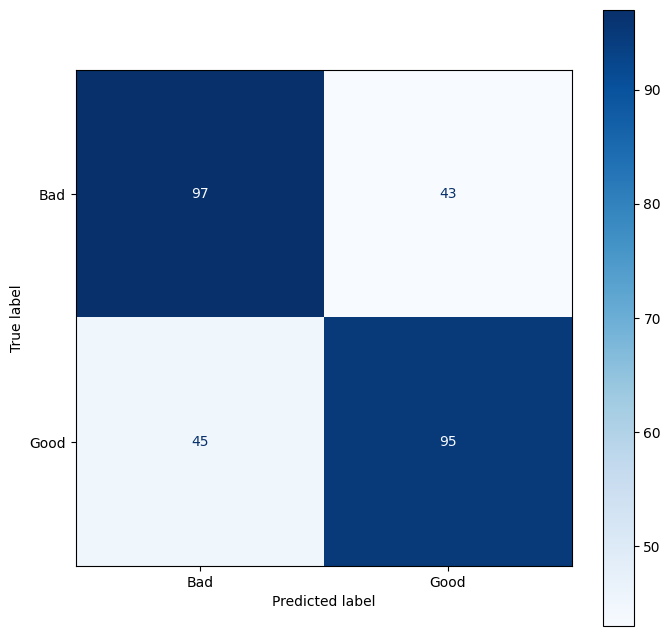

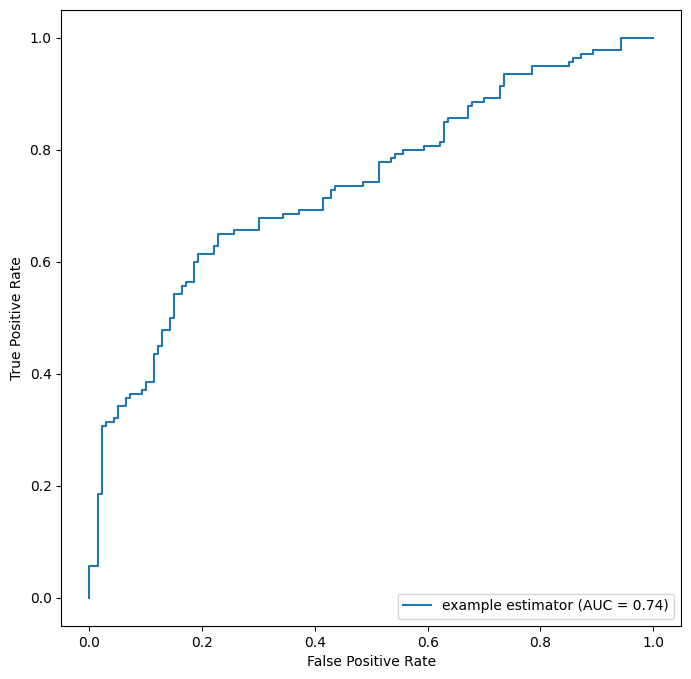

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

KNN

{'mean_fit_time': array([0.00266182, 0.00231247, 0.00227442, 0.00215542, 0.00214255,
       0.00226939, 0.00225842, 0.00235925, 0.0026027 , 0.00240436,
       0.00223806, 0.00219529, 0.002407  , 0.00268061, 0.00211654,
       0.00219777, 0.0021029 , 0.00210629, 0.00214486, 0.00218308,
       0.00233114, 0.00286071, 0.00245407, 0.00232537, 0.00218282,
       0.00235364, 0.00251548, 0.00252156]), 'std_fit_time': array([7.87753323e-04, 9.42976556e-05, 2.38329112e-04, 7.65176006e-05,
       7.94198913e-05, 2.19869150e-04, 1.06659330e-04, 3.42658234e-04,
       7.31774850e-04, 4.32547026e-05, 8.62425914e-05, 7.36258846e-05,
       5.15034716e-04, 1.21096529e-03, 7.64869097e-05, 9.31489184e-05,
       1.11595524e-04, 7.30901465e-05, 8.44332932e-05, 1.21347433e-04,
       3.43254156e-04, 1.80931273e-03, 9.86808211e-04, 1.70457715e-04,
       8.34164020e-05, 1.07847898e-04, 6.47313784e-04, 1.72446917e-04]), 'mean_score_time': array([0.01053386, 0.01012218, 0.00939224, 0.00932982, 0.00973711,
 

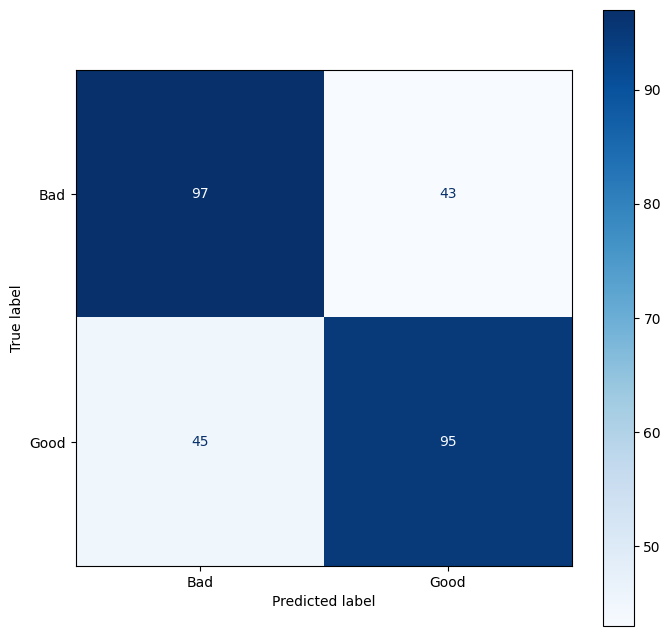

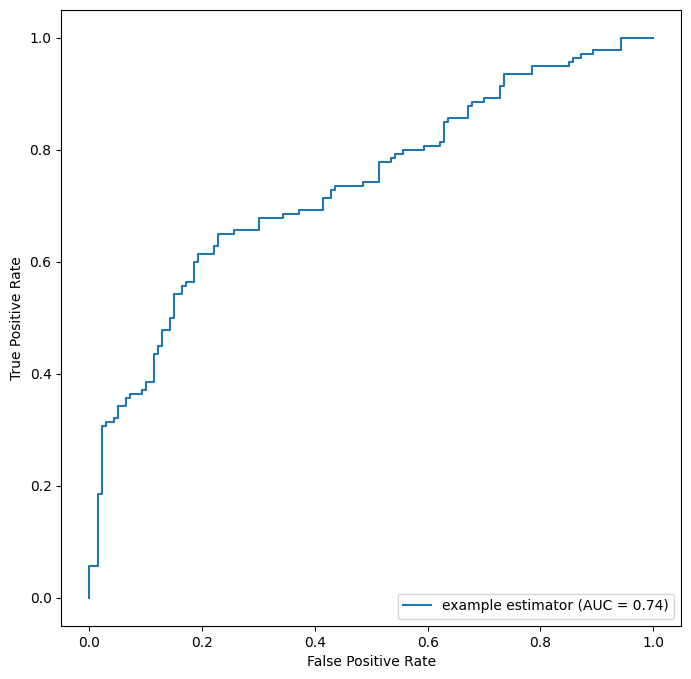

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

# Define the parameter values that should be searched
k_range = list(range(3, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(x_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions on the test data
y_pred = grid.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Best parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy score:  0.9285714285714286
F1 score:  0.9333333333333333
Precision score:  0.875
Recall score:  1.0
Error rate:  0.0714285714285714
AUC value:  0.9413775510204081


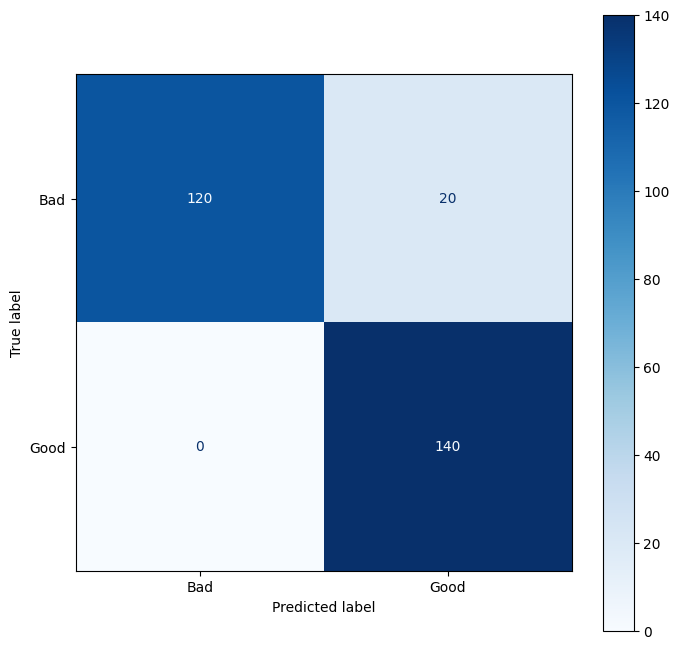

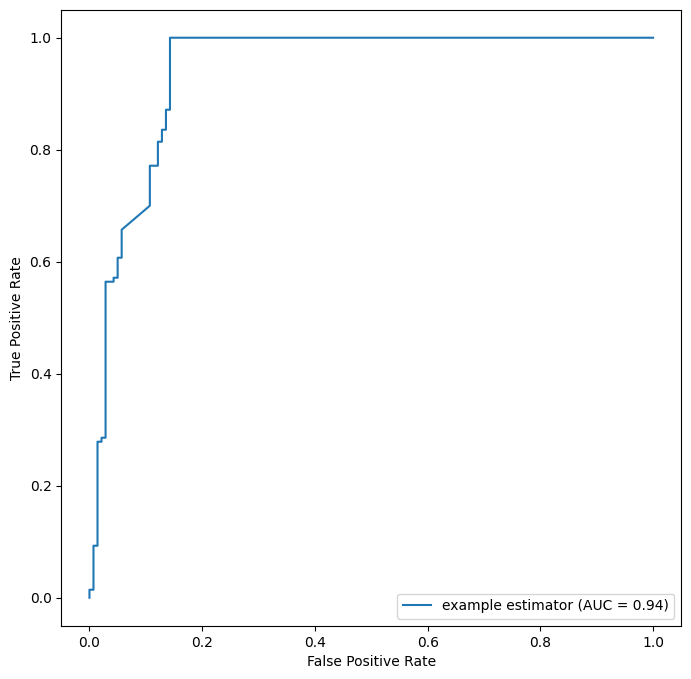

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(max_iter=1000, class_weight='balanced', random_state=0, probability=True), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()


Decision Tree

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy score:  0.8607142857142858
F1 score:  0.848249027237354
Precision score:  0.9316239316239316
Recall score:  0.7785714285714286
Error rate:  0.13928571428571423
AUC value:  0.8607142857142857


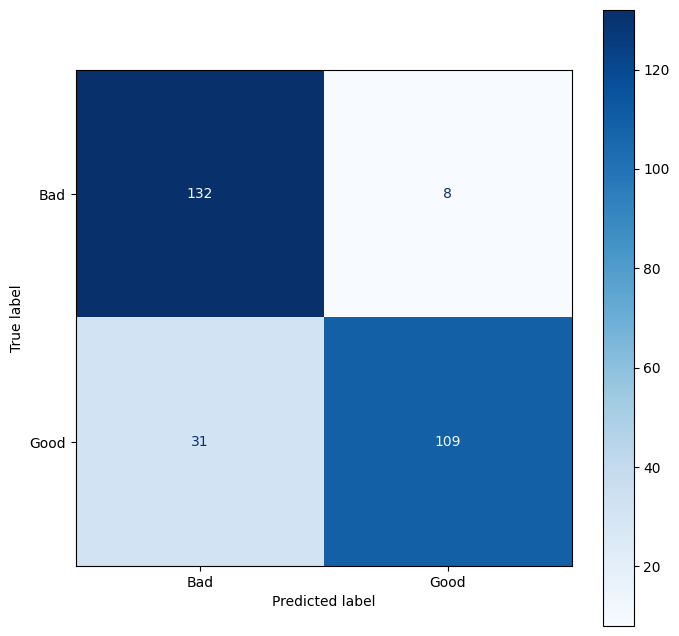

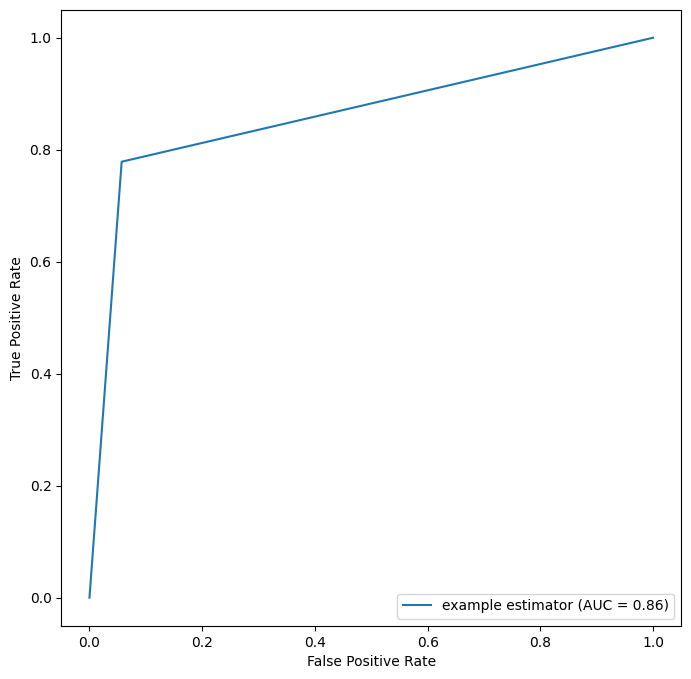

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()


Random Forrest

Best parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy score:  0.8535714285714285
F1 score:  0.844106463878327
Precision score:  0.9024390243902439
Recall score:  0.7928571428571428
Error rate:  0.14642857142857146
AUC value:  0.9638775510204083


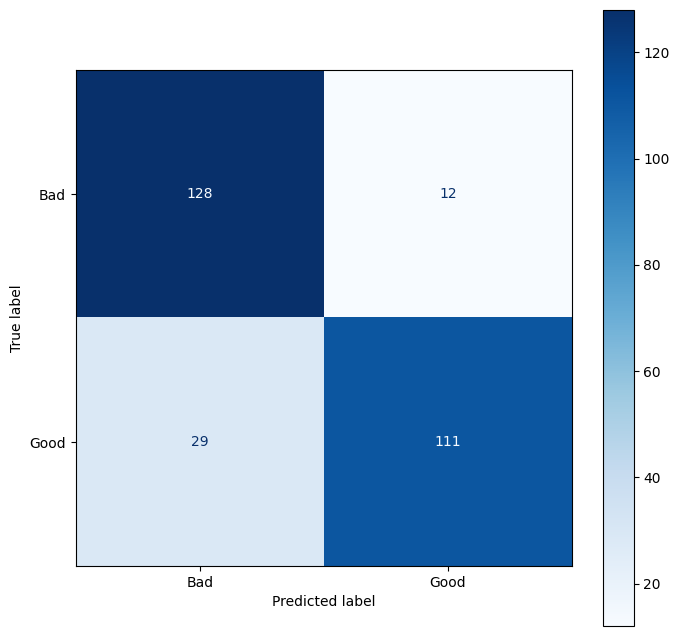

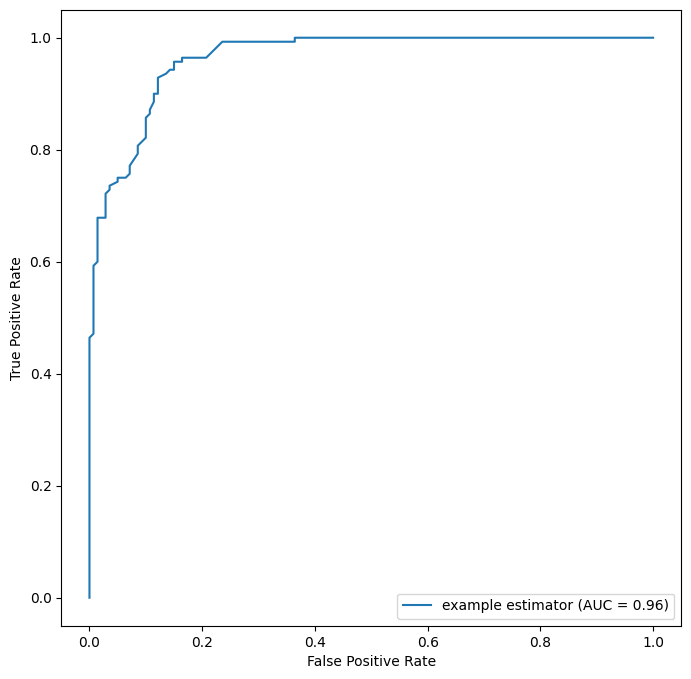

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()


XG Boost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn

Best parameters:  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}
Accuracy score:  0.875
F1 score:  0.8669201520912547
Precision score:  0.926829268292683
Recall score:  0.8142857142857143
Error rate:  0.125
AUC value:  0.9471428571428572


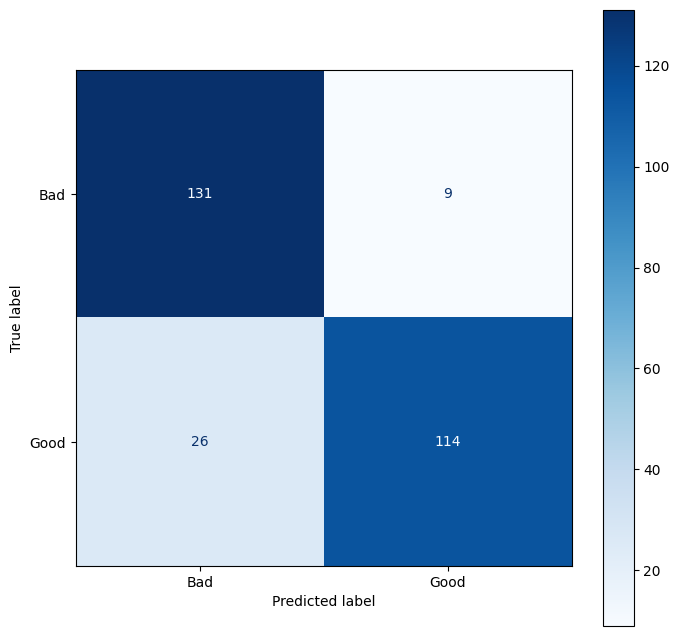

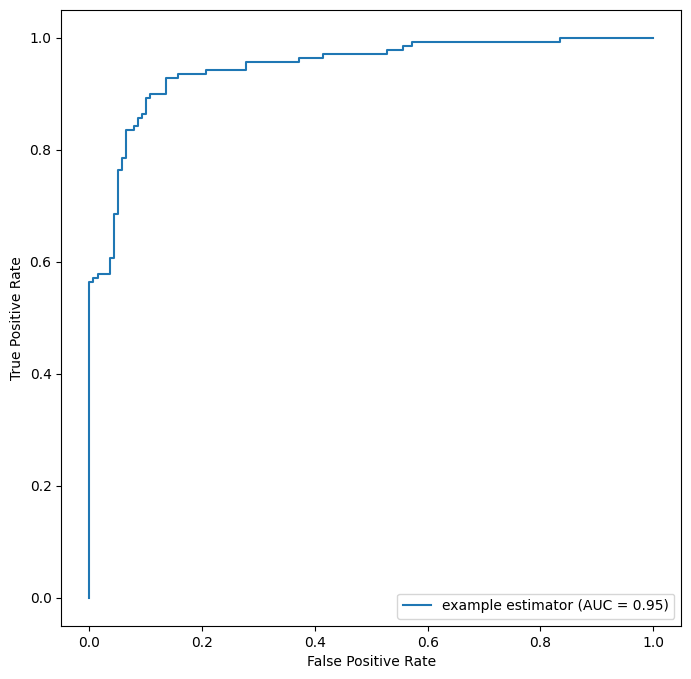

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'booster': ['gbtree', 'gblinear', 'dart']
}

# Create a GridSearchCV object
grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

#Classify with Forward Feature Selection (Without Feature Extraction)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   other_parties           1000 non-null   int64  
 9   residence_since         1000 non-null   float64
 10  property_magnitude      1000 non-null   int64  
 11  age                     1000 non-null   float64
 12  other_payment_plans     1000 non-null   int64  
 13  housing                 1000 non-null   int64  
 14  existing_credits        1000 non-null   f

just keep the selected feature

In [ ]:
# Assuming df is your DataFrame and selected_features is your list of selected features
selected_features = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since', 'age',
       'housing', 'job', 'num_dependents', 'own_telephone', 'foreign_worker',
       'sex']

# Add the target variable 'class' to the list of selected features
selected_features.append('class')

# Get all column names from the DataFrame
all_features = df.columns.tolist()

# Find the features to drop
features_to_drop = [feature for feature in all_features if feature not in selected_features]

# Drop the features
df = df.drop(columns=features_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   other_parties           1000 non-null   int64  
 9   residence_since         1000 non-null   float64
 10  age                     1000 non-null   float64
 11  housing                 1000 non-null   int64  
 12  job                     1000 non-null   int64  
 13  num_dependents          1000 non-null   float64
 14  own_telephone           1000 non-null   i

Sampling and splitting

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['class'])
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=30)

print(x_train.shape, x_test.shape)

(800, 17) (200, 17)


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score:  0.665
F1 score:  0.7219917012448134
Precision score:  0.8613861386138614
Recall score:  0.6214285714285714
Error rate:  0.33499999999999996
AUC value:  0.7501190476190476


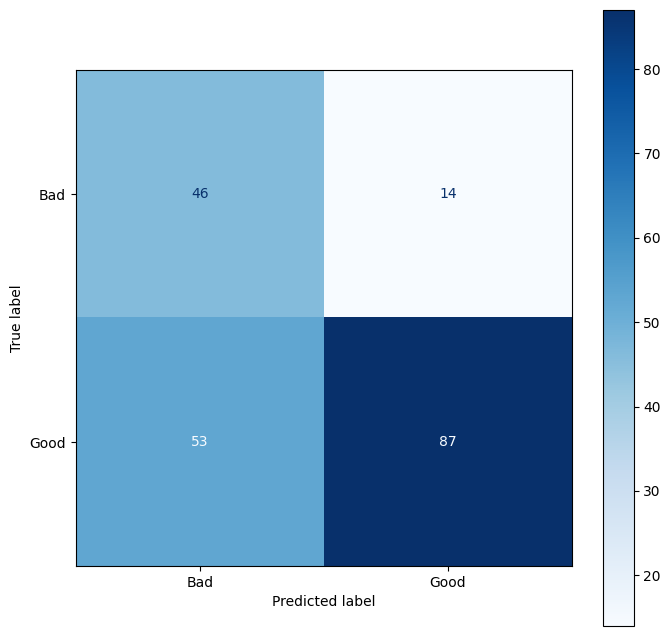

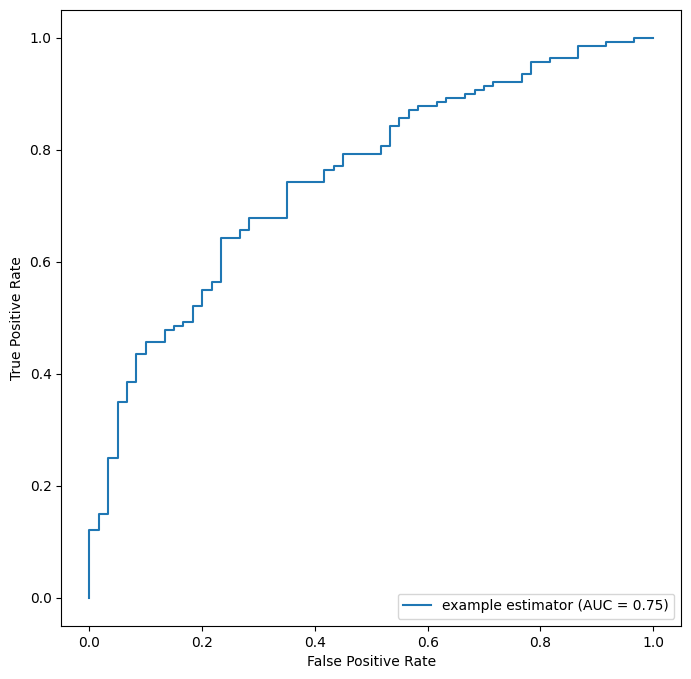

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.decision_function(x_test)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

KNN

{'mean_fit_time': array([0.00284469, 0.00215919, 0.00206175, 0.00209856, 0.002123  ,
       0.00212469, 0.00201831, 0.00665891, 0.00645595, 0.00556791,
       0.00342696, 0.00365679, 0.00369925, 0.00330174, 0.00503578,
       0.0044699 , 0.00278823, 0.00208914, 0.00207863, 0.00210862,
       0.00218146, 0.00211027, 0.00239582, 0.00221021, 0.00217714,
       0.00216489, 0.00219572, 0.00211473, 0.00218809, 0.00241122]), 'std_fit_time': array([1.14348992e-03, 8.90608158e-05, 1.00752668e-04, 8.59138960e-05,
       8.16271715e-05, 6.89693646e-05, 8.38677265e-05, 4.78058872e-03,
       5.41052621e-03, 3.60831798e-03, 2.19491292e-03, 2.53568767e-03,
       2.13150244e-03, 1.22779763e-03, 3.01573351e-03, 2.66495629e-03,
       5.38913648e-04, 5.45450699e-05, 1.99204965e-05, 6.69077300e-05,
       7.50549147e-05, 6.84444431e-05, 6.04483249e-04, 3.40993584e-04,
       7.29282020e-05, 8.04523915e-05, 2.05476796e-04, 5.55505875e-05,
       9.23046543e-05, 5.52416735e-04]), 'mean_score_time': array

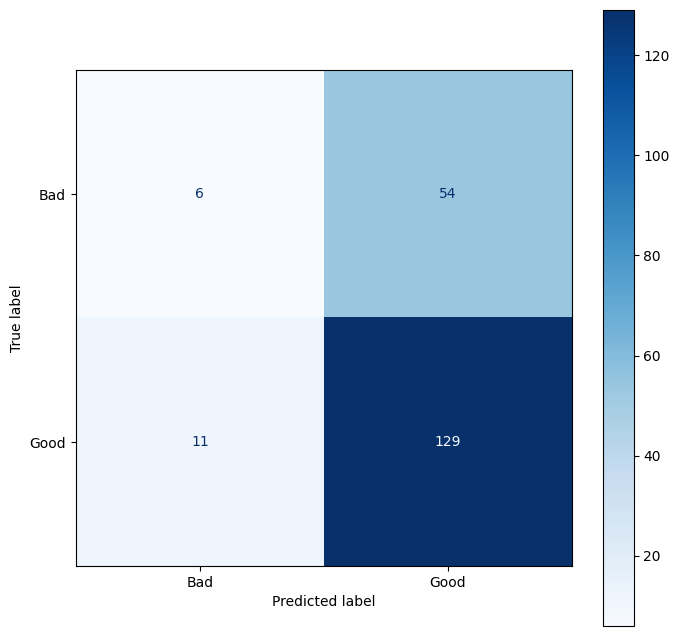

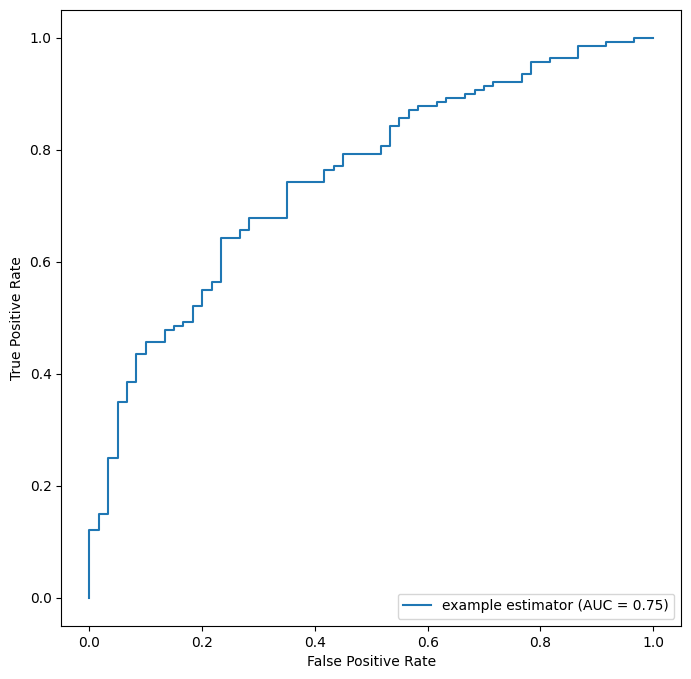

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(x_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions on the test data
y_pred = grid.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
# Compute the error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Best parameters:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy score:  0.685
F1 score:  0.806153846153846
Precision score:  0.7081081081081081
Recall score:  0.9357142857142857
Error rate:  0.31499999999999995
AUC value:  0.535952380952381


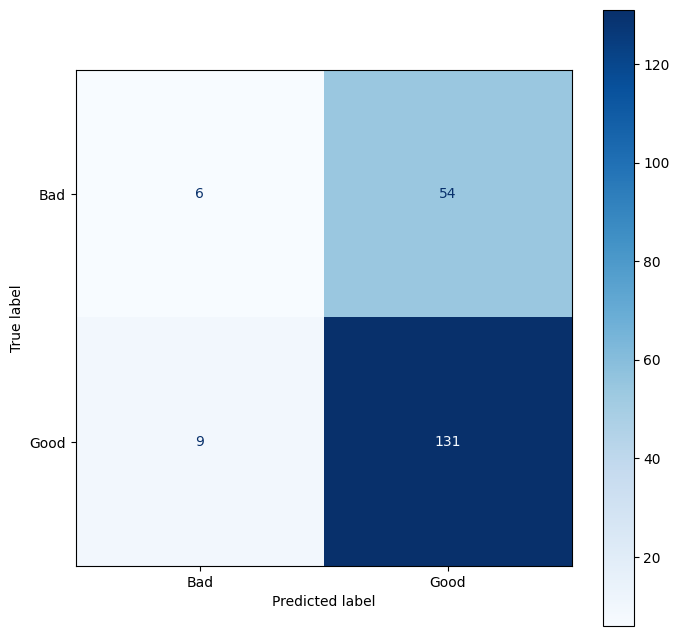

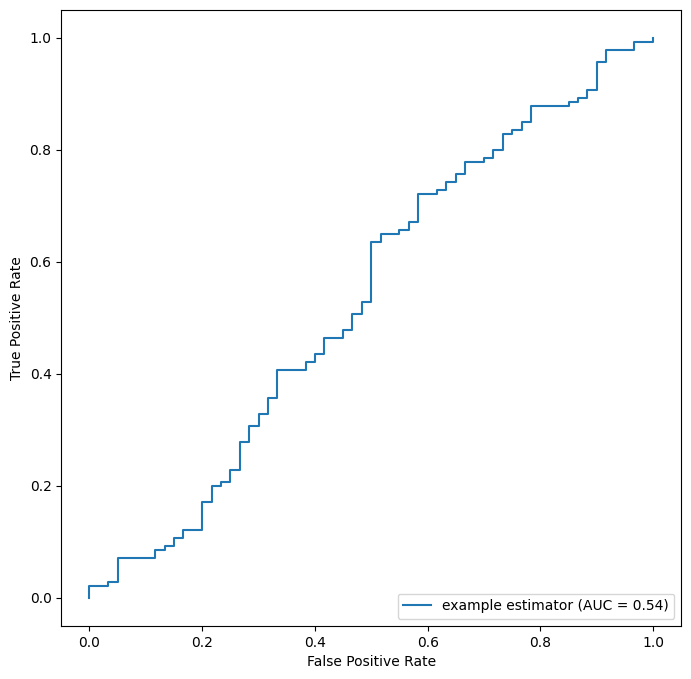

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(max_iter=1000, class_weight='balanced', random_state=0, probability=True), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

Decision Tree

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy score:  0.61
F1 score:  0.685483870967742
Precision score:  0.7870370370370371
Recall score:  0.6071428571428571
Error rate:  0.39
AUC value:  0.6688690476190476


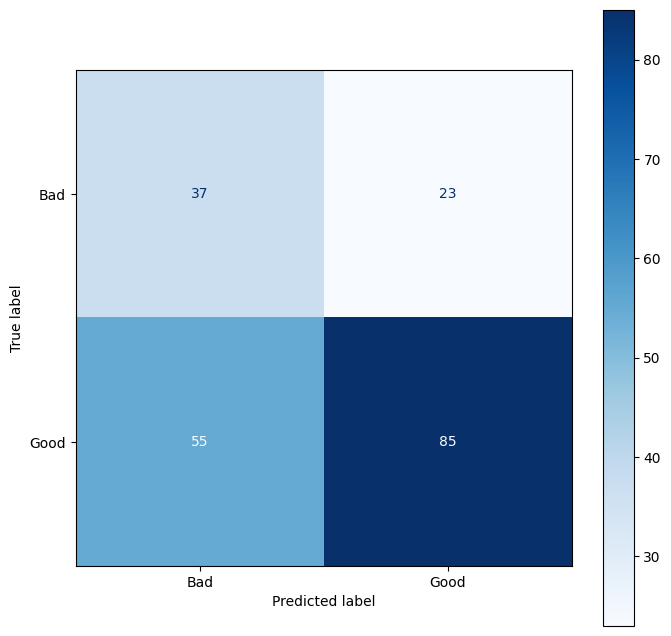

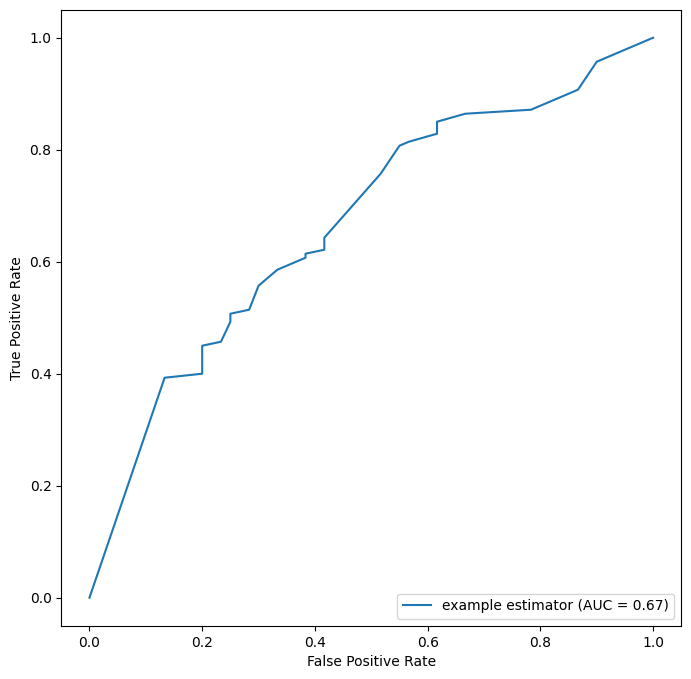

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

#Classify with Forward Feature Selection (With Feature Extraction (PCA))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   other_parties           1000 non-null   int64  
 9   residence_since         1000 non-null   float64
 10  age                     1000 non-null   float64
 11  housing                 1000 non-null   int64  
 12  job                     1000 non-null   int64  
 13  num_dependents          1000 non-null   float64
 14  own_telephone           1000 non-null   i

PCA and Splitting

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame and 'class' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define the PCA model
pca = PCA(n_components=2)

# Fit and transform the data
X_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_resample(X_train, y_train)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Shape of resampled data: {x_train.shape}')

Explained variance ratio: [9.99968093e-01 1.78589843e-05]
Shape of resampled data: (1128, 2)


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy score:  0.595
F1 score:  0.6772908366533864
Precision score:  0.7391304347826086
Recall score:  0.625
Error rate:  0.405
AUC value:  0.6112132352941175


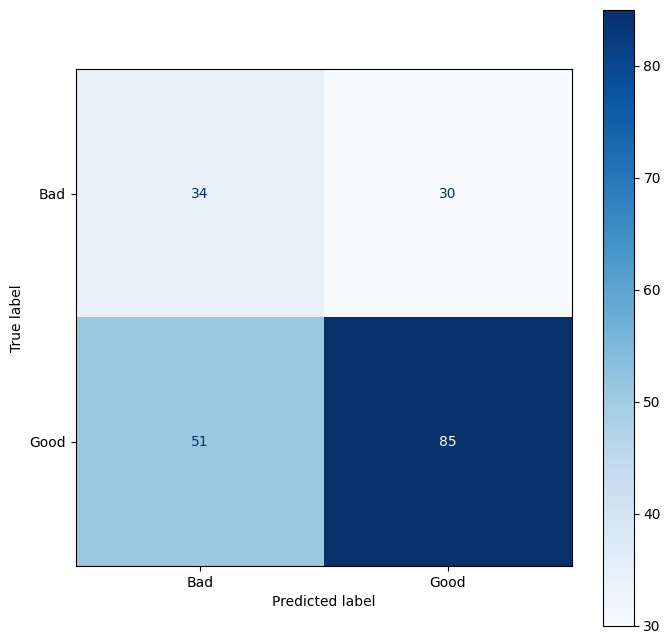

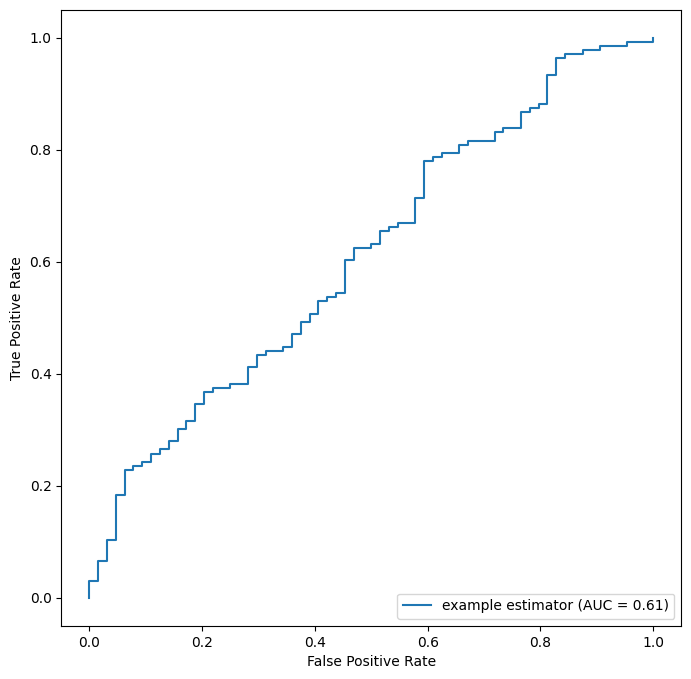

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.decision_function(x_test)
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

KNN

{'mean_fit_time': array([0.00132294, 0.00102575, 0.00129697, 0.00109415, 0.00095763,
       0.00106504, 0.00109537, 0.00130858, 0.0010534 , 0.00112495,
       0.00101964, 0.00103505, 0.00099173, 0.00120053, 0.00106373,
       0.001177  , 0.0009495 , 0.00100143, 0.00101562, 0.00108919,
       0.00093849, 0.00119431, 0.00160258, 0.0012399 , 0.00101278,
       0.00107453, 0.00112128, 0.00120323, 0.00106122, 0.00105519]), 'std_fit_time': array([9.34179390e-04, 4.89116223e-05, 5.04917331e-04, 2.21452356e-04,
       5.69094910e-05, 9.72357635e-05, 7.65106766e-05, 4.14678265e-04,
       5.77017343e-05, 2.24971983e-04, 4.56959607e-05, 1.11617794e-04,
       4.82394733e-05, 3.74806749e-04, 1.45015627e-04, 3.16071431e-04,
       3.74355512e-05, 5.07929002e-05, 1.37164710e-04, 2.79720887e-04,
       3.46526539e-05, 3.25213500e-04, 1.00689224e-04, 2.69488650e-04,
       5.11389178e-05, 1.44586684e-04, 2.47270758e-04, 3.44585112e-04,
       5.62764267e-05, 8.12882752e-05]), 'mean_score_time': array

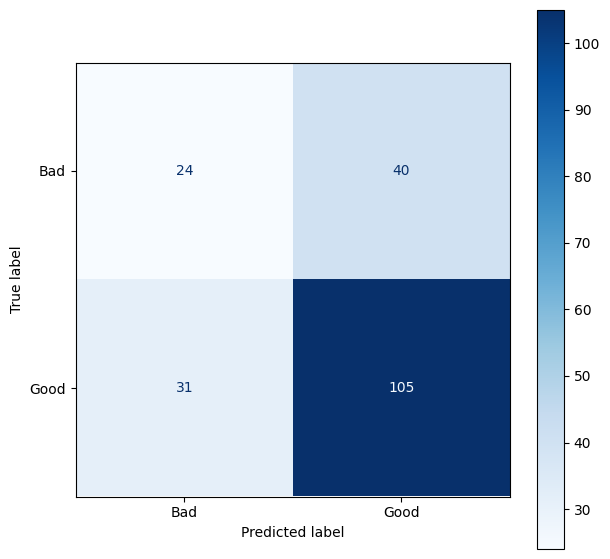

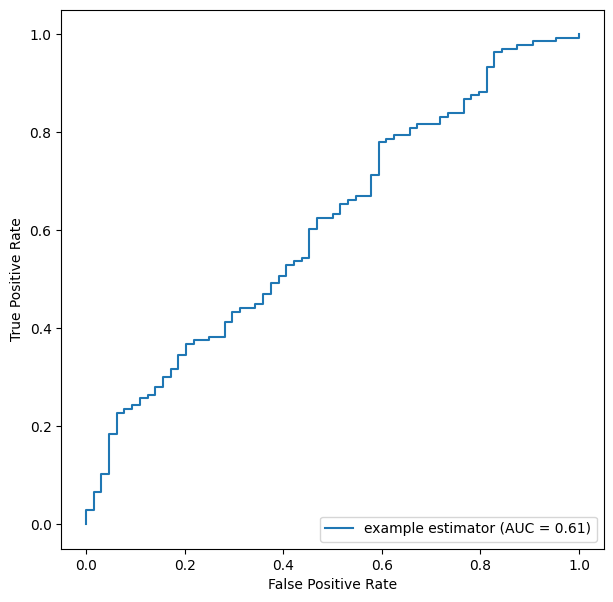

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(x_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions on the test data
y_pred = grid.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
# Compute the error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(7, 7))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(7, 7))
roc_display.plot(ax=ax)
plt.show()

SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Best parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy score:  0.685
F1 score:  0.8119402985074627
Precision score:  0.6834170854271356
Recall score:  1.0
Error rate:  0.31499999999999995
AUC value:  0.5703125


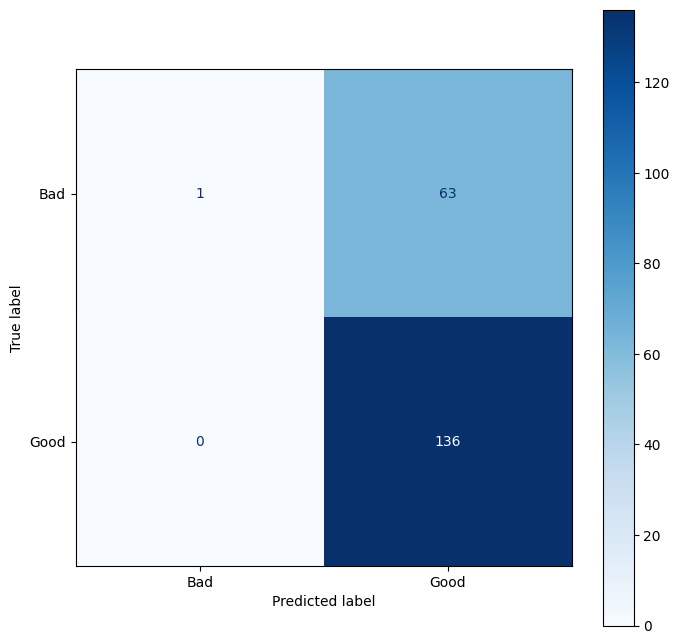

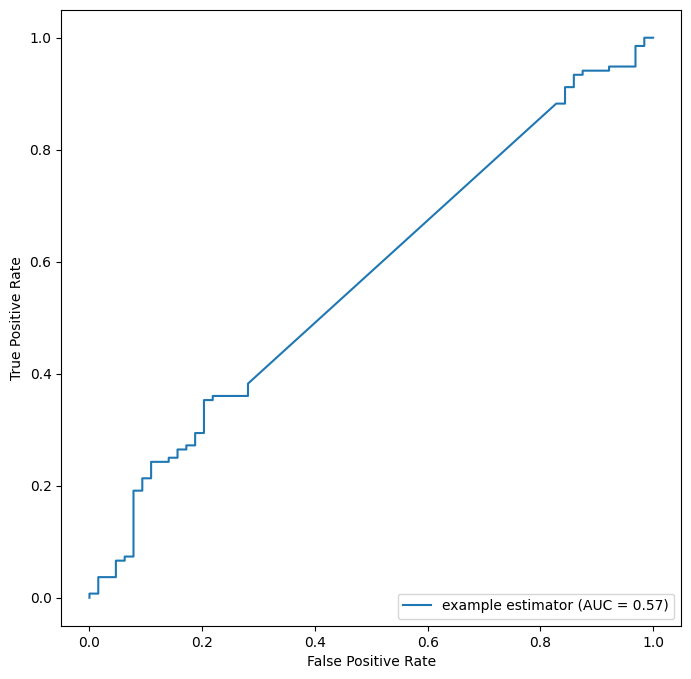

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(max_iter=1000, class_weight='balanced', random_state=0, probability=True), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()

Decision Tree

Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy score:  0.625
F1 score:  0.7272727272727274
Precision score:  0.7194244604316546
Recall score:  0.7352941176470589
Error rate:  0.375
AUC value:  0.5629595588235294


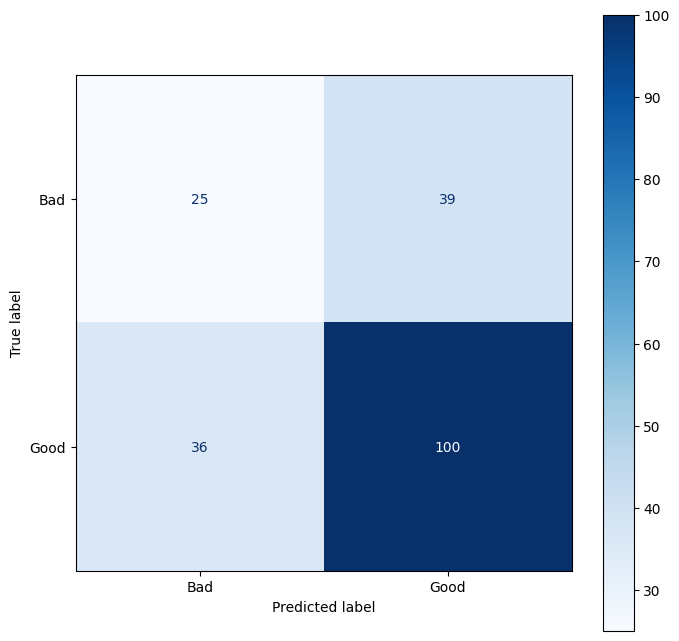

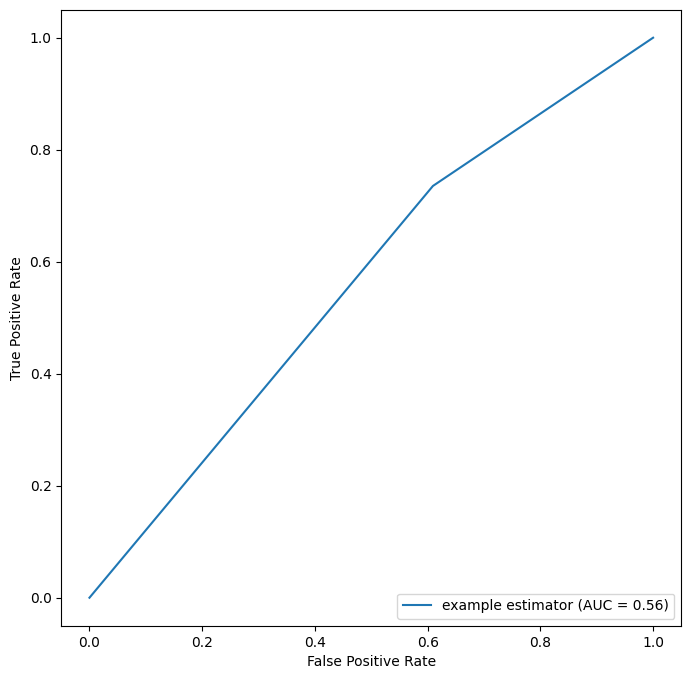

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid.fit(x_train, y_train)

# Print the best parameters
print('Best parameters: ', grid.best_params_)

# Use the best model to make predictions
clf = grid.best_estimator_
Y_pred = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Compute the error rate
error_rate = 1 - accuracy_score(y_test, Y_pred)
print('Error rate: ', error_rate)

# Compute the AUC value
y_score = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print('AUC value: ', roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues, ax=ax)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
fig, ax = plt.subplots(figsize=(8, 8))
roc_display.plot(ax=ax)
plt.show()